# Aim


`find Local Importance with using SHAP`  
`firstly create clustering algorithm to capture information about clusters then Dimension reduction algorithm`   
`Check for Countries what factors are most important ?`  
`create shap summary plot`  
`local importance visualize for some countries`  

**References**  

https://towardsdatascience.com/idea-behind-lime-and-shap-b603d35d34eb

### Import Data From Excel 
#### Delete String Columns, Create X and y variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

df = pd.read_excel('input_data/all_meta_data.xlsx', index_col=0) #, index_col=0

#df = data.drop("Country", axis='columns')
#df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]

X = df.iloc[:,6:]
y = df.iloc[:,1]

df.head()

,Pub. with AMR and Country,Pub. With Country,Relative Importance,TF \n(pub. counts with keyword/total with keywords),IDF \nlog(total pub./pub. with keywords),TF-IDF,(P01A) Agents against amoebiasis and other protozoal diseases,(P01A) %,(J01X) Other antibacterials,(J01X) %,...,Life expectancy at birth Male years,Life expectancy at birth female years,Women who were first married by age 18 % of women ages 20-24,"Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",Wage and salary workers Male % of male employment,Wage and salaried workers female % of females employment,Firms with female participation in ownership % of firms,Female share of employment in senior and middle management %,Women in parliaments % of total seats
Country,,,,,,,,,,,,,,,,,,,,,
Latvia,16,467,0.034261,0.003965,2.916680,0.011566,2.29,0.172,0.50,0.037,...,69.8,79.7,0.0,94.1,92.5,86.6,90.3,41.6,44.1,30
Portugal,102,3932,0.025941,0.025279,1.991384,0.050340,0.80,0.045,1.16,0.065,...,78.4,84.6,0.0,94.2,90.6,79.3,87.6,0.0,30.4,36
"Iran, Islamic Rep.",307,16941,0.018122,0.076084,1.357058,0.103251,2.59,0.066,0.33,0.008,...,75.2,77.4,17.0,96.5,91.6,54.4,56.5,0.0,0.0,6
Estonia,16,895,0.017877,0.003965,2.634174,0.010445,1.50,0.123,0.65,0.053,...,73.8,82.6,0.0,97.5,98.4,85.7,93.2,35.8,34.3,30
Kosovo,8,448,0.017857,0.001983,2.934719,0.005819,0.61,0.030,0.22,0.010,...,69.8,74.2,0.0,61.1,43.7,0.0,0.0,13.2,15.3,0


## Create RandomForest Regression Model


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=448, max_depth = 6,min_samples_leaf=2, max_features='auto',random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=2, n_estimators=448,
                      random_state=42)

## Import SHAP and Use TreeExplainer Model
### Variable Importance Plot — Global Interpretability
A variable importance plot lists the most significant variables in descending order  
The top variables contribute more to the model than the bottom ones and thus have high predictive power.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


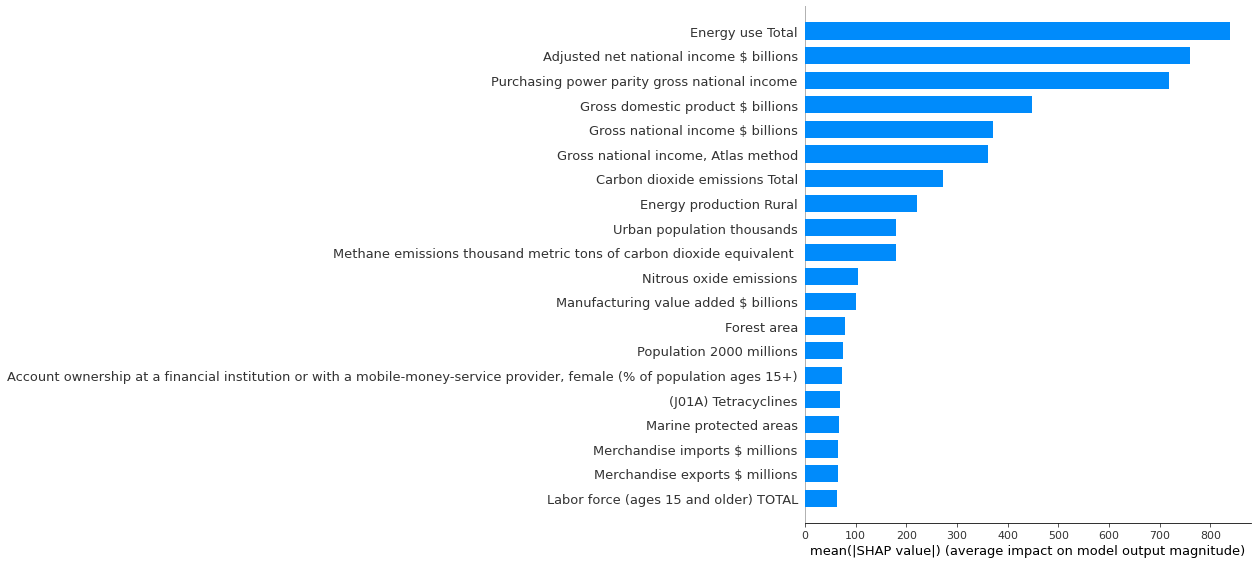

In [5]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

## Show the positive and negative relationships of the predictors with the target variable. 
This plot is made of all the dots in the train data. It demonstrates the following information:

`Feature importance`: Variables are ranked in descending order.  
`Impact`: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.  
`Original value`: Color shows whether that variable is high (in red) or low (in blue) for that observation.  
`Correlation`: A high level of the “<b>Energy use Total</b>” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. 

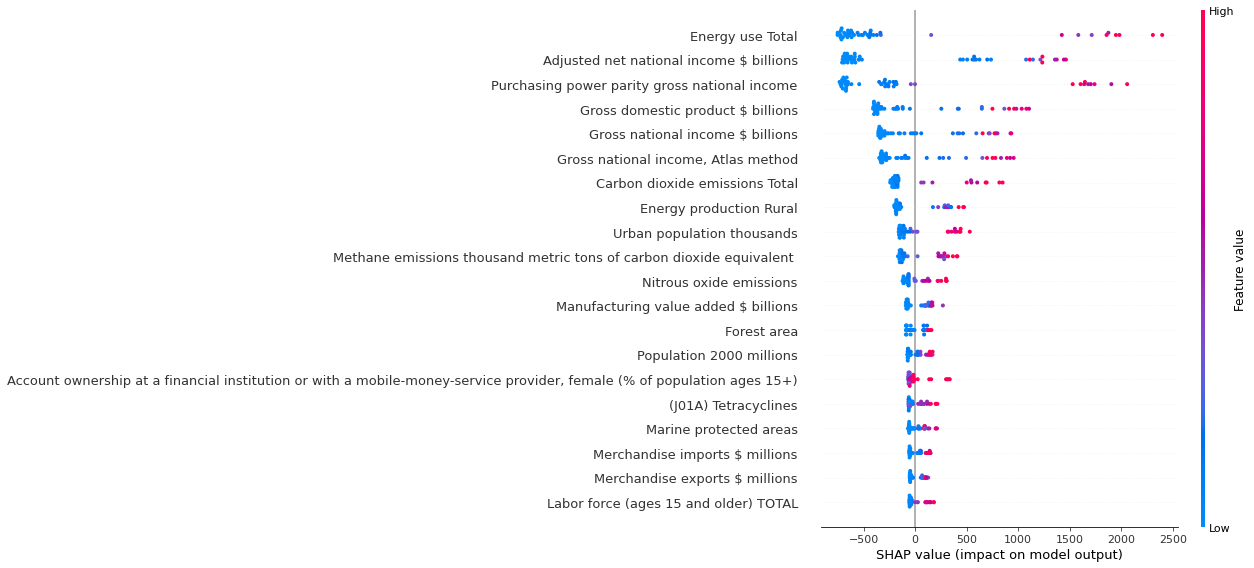

In [6]:
shap.summary_plot(shap_values, X_train)
#import matplotlib.pyplot as plt
#f = plt.figure()
#f.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

## SHAP Dependence Plot — Global Interpretability  
Each dot represents a row of the data.   
The horizontal location is the actual value from the dataset, and the vertical location shows what having that value did to the prediction. 

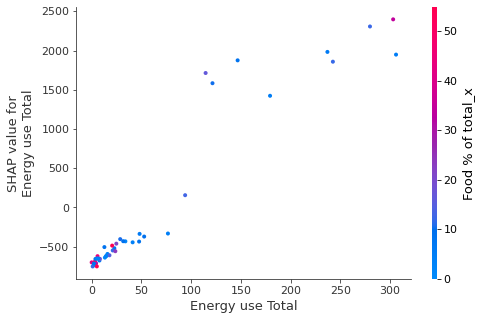

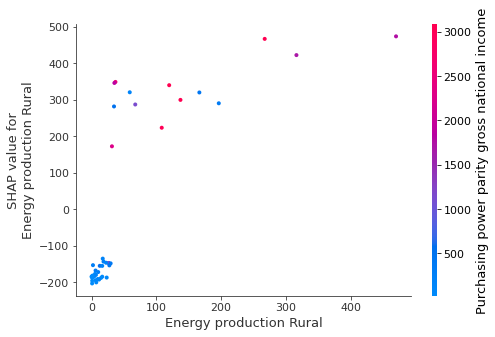

In [7]:
shap.dependence_plot("Energy use Total", shap_values, X_train)
shap.dependence_plot("Energy production Rural", shap_values, X_train)

##  Individual SHAP  Plot — Local Interpretability

`The output value` is the prediction for that observation  
`The base value`  The original paper explains that the base value E(y_hat) is “the value that would be predicted if we did not know any features for the current output. This is  the mean prediction of Y_test. test it out by Y_test.mean()  
`Red/blue` Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.  

The SHAP model is built on the training data set. The means of the variables are: X_train.mean()

In [8]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)
random_picks = np.arange(1,19,1) 
S = X_output.iloc[random_picks]

Cote d'Ivoire


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


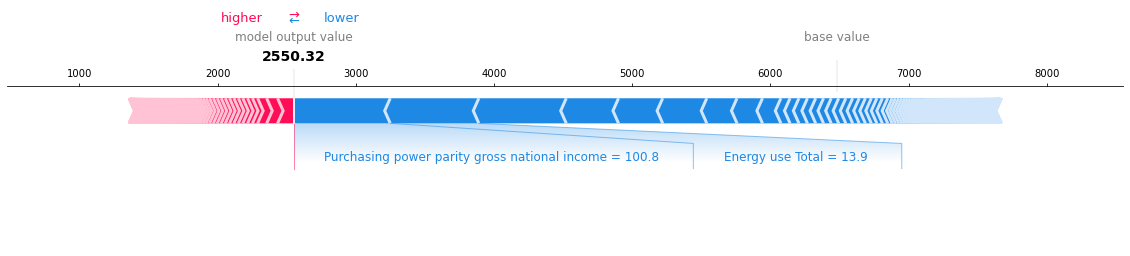

Latvia


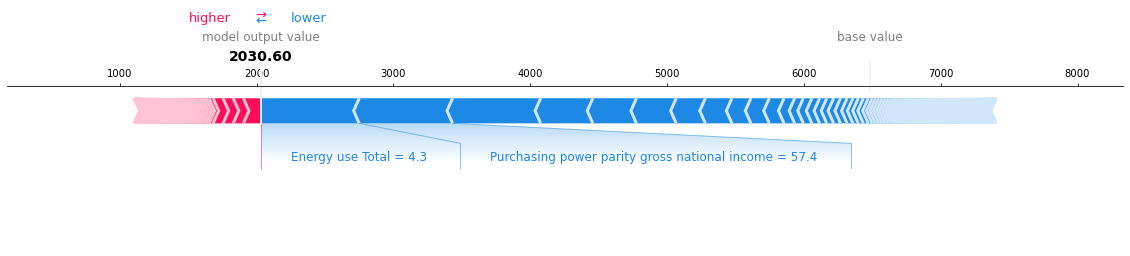

Netherlands


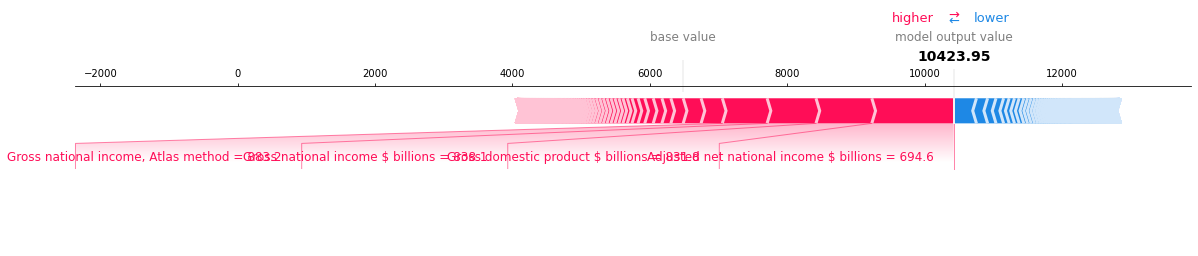

Korea, Rep.


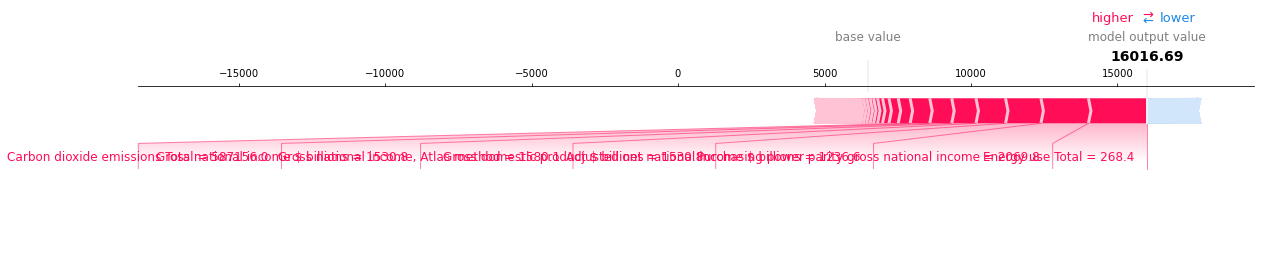

Uzbekistan


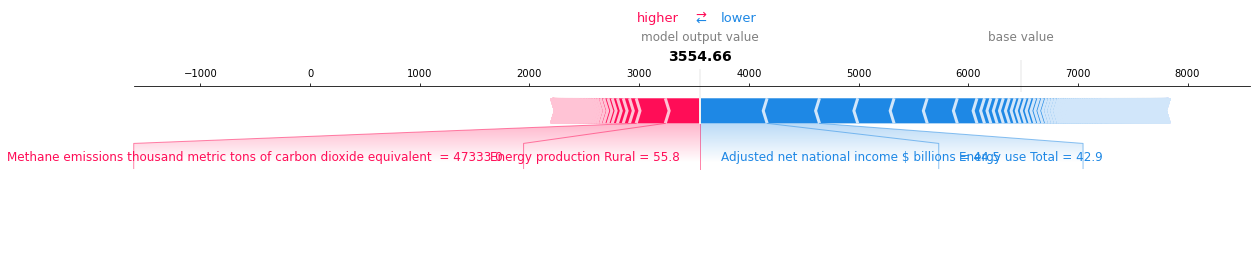

In [9]:
shap.initjs()

def shap_plot(j):
    print(S.index[j])
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]], matplotlib=True)
    #return(p)

for i in range(5):
    shap_plot(i)

## The collective force plot

In [10]:
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    shap.force_plot(explainerModel.expected_value, shap_values_Model, X_train)